<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Properties, Autoregressive, and Moving Average Models

_Authors: Kiefer Katovich (SF), Justin Pounders_

---
<a id="learning-objectives"></a>

### Learning Objectives

- Describe and calculate a time series decomposition.
- Calculate and plot ACF and PACF
- Create autoregressive and moving average models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id="load-the-unemployment-data"></a>
<a id="load-the-unemployment-data"></a>
## Load the Unemployment Data
---

This is historical quarterly data regarding unemployment rates in the United States. First, perform any necessary cleaning.

In [2]:
data = pd.read_csv('../datasets/seasonally-adjusted-quarterly-us.csv')

In [3]:
data.columns = ['year_quarter', 'unemployment_rate']
data['unemployment_rate'] = data['unemployment_rate'].map(lambda x: float(str(x).replace('%','')))
data.dropna(inplace=True)

<a id="create-a-datetime-index"></a>
<a id="create-a-datetime-index"></a>
## Create a Datetime Index
---

This is quarterly data, so converting to datetime is a bit complicated. `.dt.to_period('Q')` will help us represent the string as a datetime object.

In [4]:
data['date'] = pd.to_datetime(data.year_quarter).dt.to_period('Q')
data.set_index('date', inplace=True, drop=True)
data.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


<a id="visually-examine-the-unemployment-rate"></a>
<a id="visually-examine-the-unemployment-rate"></a>
## Visually Examine the Unemployment Rate
---

Plot the unemployment rate.

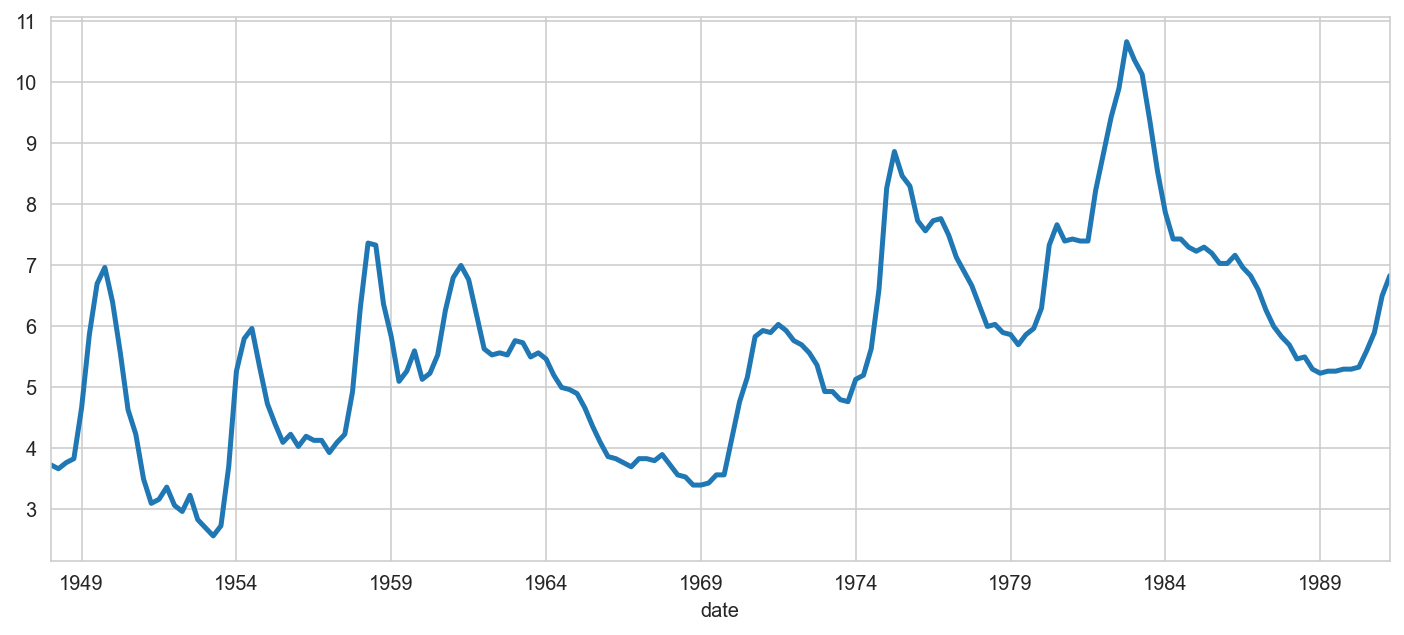

In [5]:
data['unemployment_rate'].plot(lw=2.5, figsize=(12,5))

In [6]:
date_ticks = data.index.to_timestamp()

<a id="autocorrelation-and-the-autocorrelation-function-acf"></a>
<a id="autocorrelation-and-the-autocorrelation-function-acf"></a>
##  Autocorrelation and the Autocorrelation Function (ACF)
---

In previous weeks, our analyses have been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely earlier values relate to values that occur later in time.

Examples of autocorrelation are:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less of an extent.

Below is the formula for the autocorrelation function (ACF):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ and measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$


<a id="computing-autocorrelation"></a>
<a id="computing-autocorrelation"></a>
### Computing Autocorrelation

To compute autocorrelation, we fix a lag, _k_, which is the delta between the given point and the prior point used to compute the correlation.

With a _k_ value of 1, we'd compute how correlated a value is with the value that's immediately prior. With a _k_ value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.

In [7]:
autocorr_quarter_lag1 = data.unemployment_rate.autocorr(lag=1)
autocorr_year_lag1 = data.unemployment_rate.resample('A').mean().autocorr(lag=1)

print(autocorr_quarter_lag1)
print(autocorr_year_lag1)

0.9648069187085497
0.734442071553505


<a id="autocorrelation-using-statsmodels"></a>
<a id="autocorrelation-using-statsmodels"></a>
### Autocorrelation Using Statsmodels

Statsmodels comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out:

```python
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
```

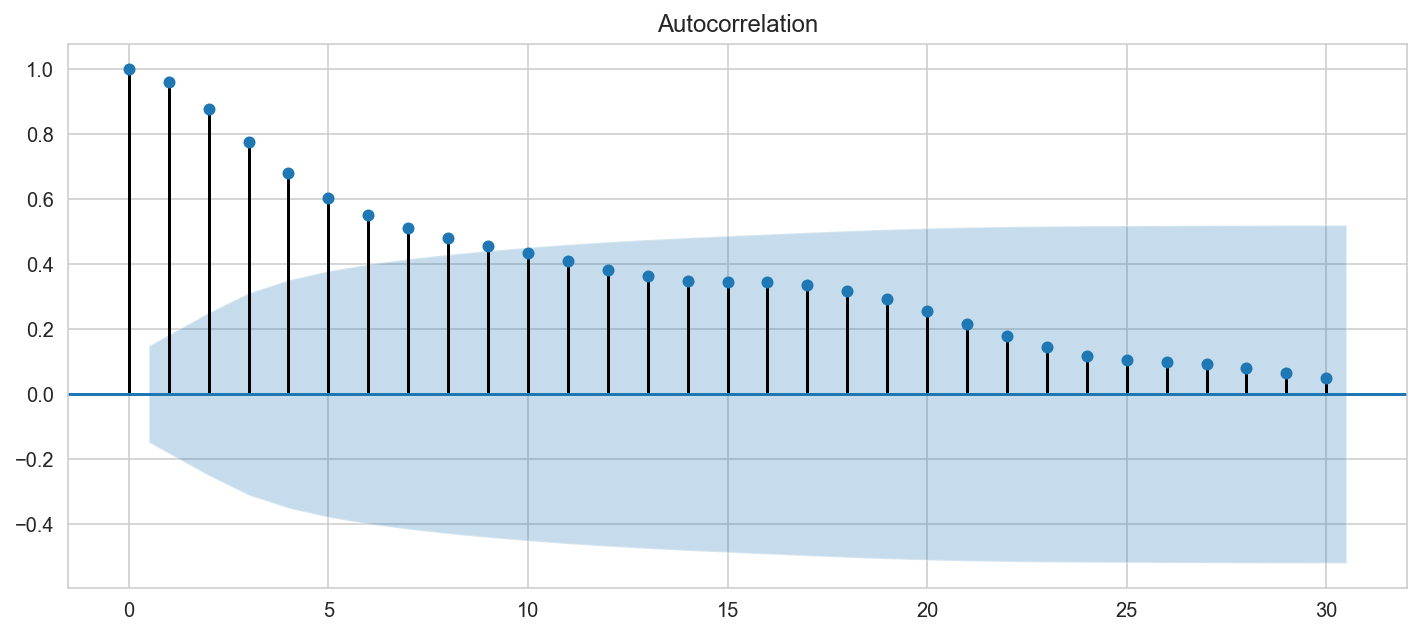

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,5))
plot_acf(data.unemployment_rate, lags=30, ax=ax)
plt.show()

# blue area is showing confidence interval, if line falls outside the blue region, it is statistically significant
# and can be trusted. (based on hypothesis testing)

In [9]:
acf(data.unemployment_rate.values)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.95950578,  0.87513008,  0.77480906,  0.67860558,
        0.60302767,  0.54946953,  0.50980855,  0.47862666,  0.45530485,
        0.43290704,  0.40733564,  0.38242446,  0.36262662,  0.34831031,
        0.34311303,  0.34269765,  0.33602242,  0.31802897,  0.29043284,
        0.25556895,  0.2160284 ,  0.17728841,  0.14298489,  0.1174645 ,
        0.10443249,  0.0983227 ,  0.09189054,  0.07989638,  0.06491514,
        0.0504506 ,  0.03938976,  0.03186116,  0.02577897,  0.01922499,
        0.00854907, -0.00629097, -0.0236317 , -0.03795652, -0.04774544,
       -0.04766326])

<a id="partial-autocorrelation-and-the-partial-autocorrelation-function-pacf"></a>
<a id="partial-autocorrelation-and-the-partial-autocorrelation-function-pacf"></a>
## Partial Autocorrelation and the Partial Autocorrelation Function (PACF)
---

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

Load up the sister functions for partial autocorrelation from Statsmodels and test them out on the differenced time series.

```python
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
```

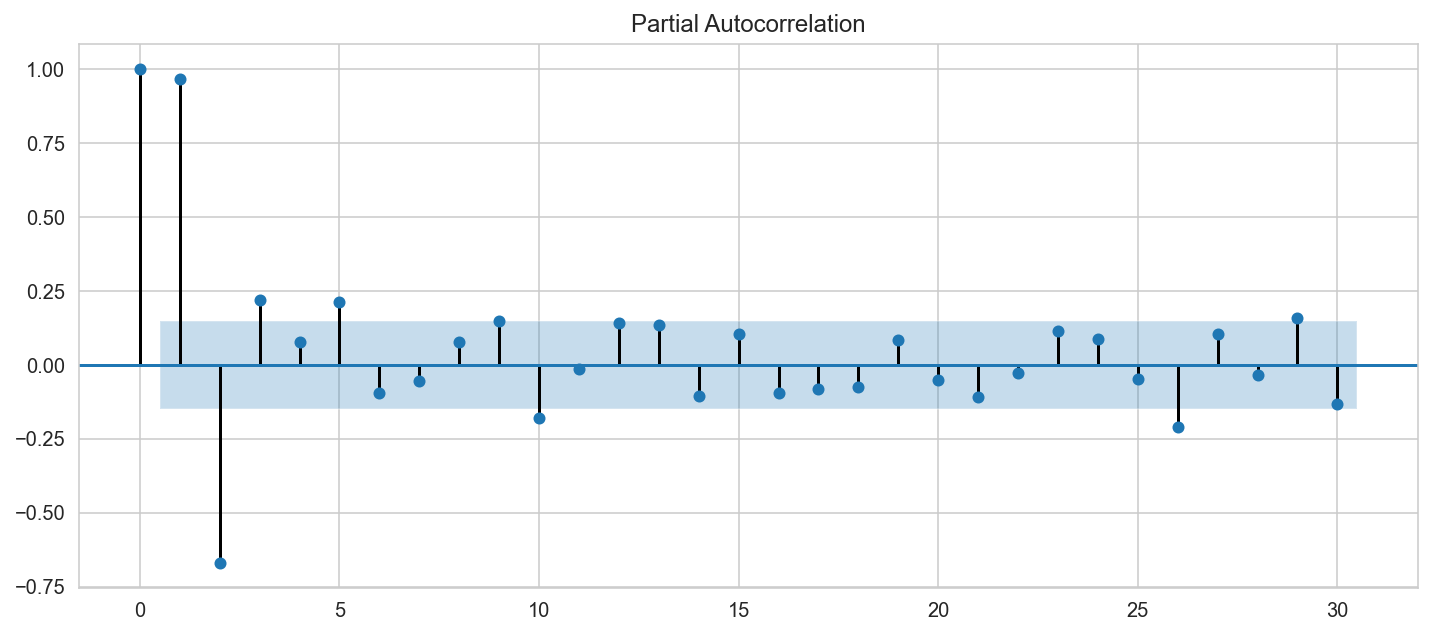

In [10]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(data.unemployment_rate, lags=30, ax=ax)
plt.show()

In [11]:
pacf(data.unemployment_rate)

array([ 1.        ,  0.96505205, -0.67010933,  0.21691526,  0.07494577,
        0.21322536, -0.09593115, -0.05491075,  0.07521878,  0.14700603,
       -0.18064033, -0.01381037,  0.1414165 ,  0.13517355, -0.10704305,
        0.10418921, -0.0958789 , -0.08324834, -0.07692577,  0.08321147,
       -0.05132902, -0.10983221, -0.02697883,  0.11522708,  0.08706447,
       -0.04999405, -0.211133  ,  0.10306874, -0.03625734,  0.15691032,
       -0.13314136,  0.02109581, -0.11693186,  0.14926814, -0.08634752,
       -0.11964679, -0.04801546,  0.18371963,  0.17030783, -0.15981006,
        0.10459434])

--- 

## Time Series Decomposition

$$ Y_t = T_t + S_t + C_t + \varepsilon_t$$

- $Y_t = $ observed value at time $t$
- $T_t = $ trend component, *long-run behavior*
- $S_t = $ seasonality component, *periodic fluctuations*
- $C_t = $ cyclical component, *non-periodic fluctuations*
- $\varepsilon_t = $ noise component, *we would like this to be stationary*

> Decomposition above is additive; can also be multiplicative.


There are several algorithms for performing this decomposition

- Classical decomp., [https://www.otexts.org/fpp/6/3](https://www.otexts.org/fpp/6/3)
- X-12-ARIMA, [https://www.otexts.org/fpp/6/4](https://www.otexts.org/fpp/6/4)
- STL, [https://www.otexts.org/fpp/6/5](https://www.otexts.org/fpp/6/5)

See also `seasonal_decompose` in `statsmodel.tsa.seasonal`.  

> Nice tutorial here: [http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/](http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


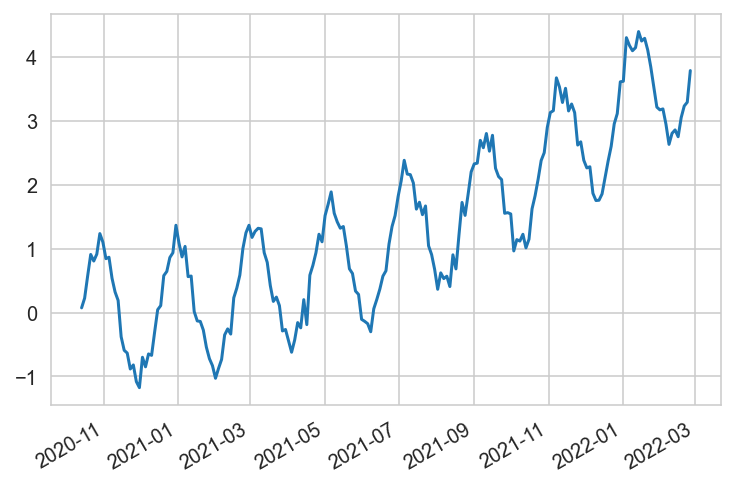

In [12]:
# Make some fake data
n = 201
np.random.seed(42)
t = np.linspace(0, 500, n)
signal = (t/250)**2 + np.sin(t/10) + np.random.normal(scale=0.15, size=n)

d0 = datetime.datetime.now()
dt1 = datetime.timedelta(1)
signal = pd.Series(signal, index=[d0+dt1*i for i in t])

signal.plot()

(C1) **Is the above *stationary***?

**Questions:** 
- *What is the long-term behavior of my series?*
- *How does my time series fluctuate?*


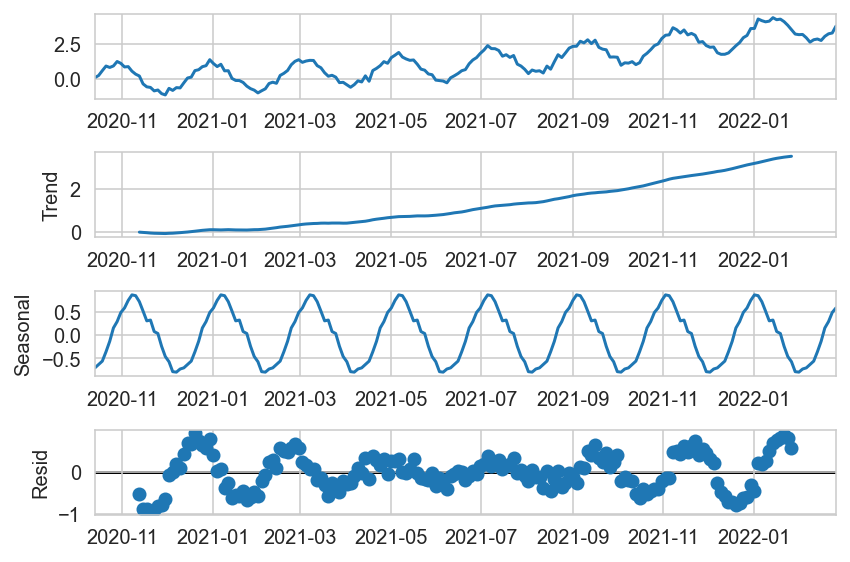

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(signal)
result.plot();

Hmmm... definitely some seasonality still left in the residual. From the `statsmodels` docs:

> "This is a naive decomposition. More sophisticated methods should be preferred."

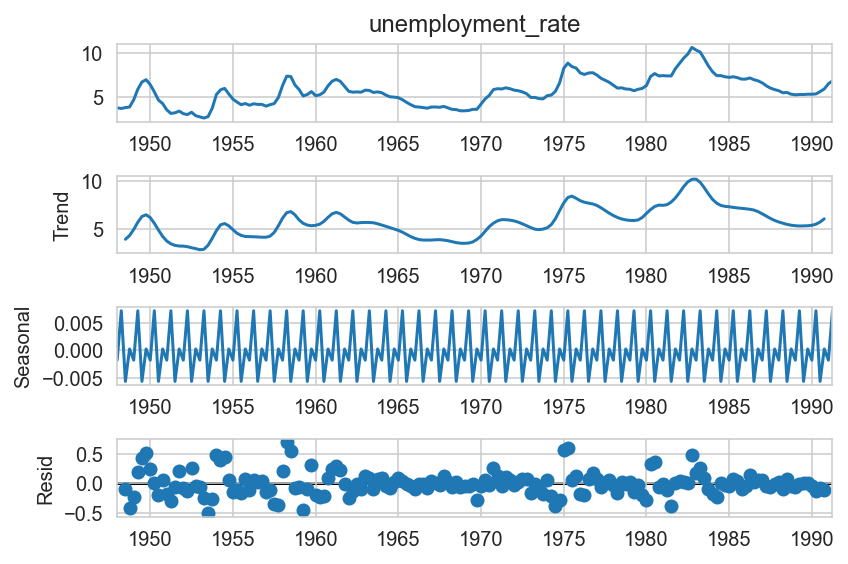

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

tsindex = data.index.to_timestamp()
data_ts = data.copy()
data_ts.index = tsindex

result = seasonal_decompose(data_ts.unemployment_rate)
result.plot();

In [15]:
result.resid[:10]

date
1948-01-01         NaN
1948-04-01         NaN
1948-07-01   -0.094035
1948-10-01   -0.425747
1949-01-01   -0.231318
1949-04-01    0.201224
1949-07-01    0.438840
1949-10-01    0.520753
1950-01-01    0.251682
1950-04-01    0.009724
Freq: QS-OCT, Name: resid, dtype: float64

<a id="differencing-a-timeseries-and-stationarity"></a>
<a id="differencing-a-timeseries-and-stationarity"></a>
## "Differencing" a Time Series and Stationarity
---

If a time series is stationary, the mean, variance, and autocorrelation (covered in the next section) will be constant over time. 

> Forecasting methods typically assume the time series you are forecasting on to be stationary — or at least approximately stationary.

The most common way to make a time series stationary is through "differencing." This procedure converts a time series into the difference between values.

<a id="-delta-yt--yt---yt--"></a>
### $$ \Delta y_t = y_t - y_{t-1} $$

This removes trends in the time series and ensures that the mean across time is zero. In most cases, this only requires a single difference, although, in some cases, a second difference (or third, etc.) will be necessary to remove trends.

**Difference the unemployment rate and plot.**

In [16]:
data['unemp_diff'] = data['unemployment_rate'].diff()

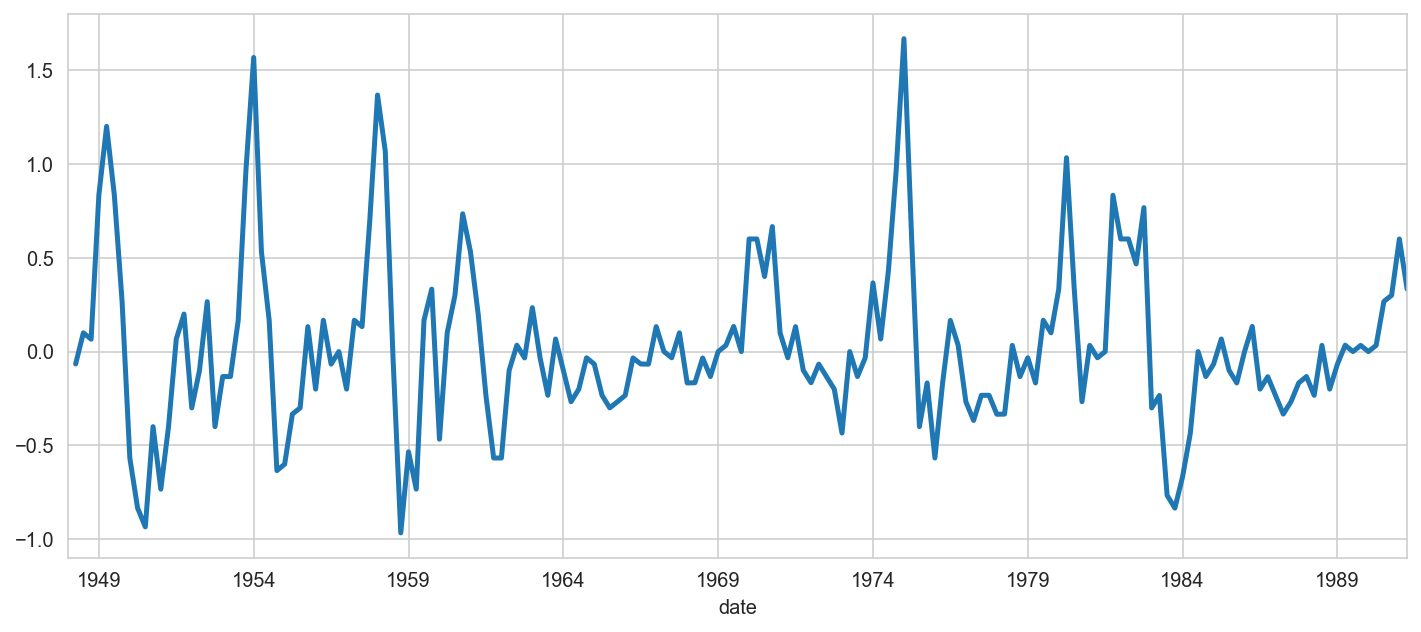

In [17]:
data['unemp_diff'].plot(lw=2.5, figsize=(12,5))

<a id="autoregressive-ar-models"></a>
<a id="autoregressive-ar-models"></a>
## Autoregressive (AR) Models

---

Autoregressive (AR) models use data from previous time points to predict the next time point. These are essentially regression models in which the predictors are previous time points of the outcome.

Typically, AR models are denoted as `AR(p)`, where _p_ indicates the number of previous time points to incorporate. `AR(1)` is the most common.

In an autoregressive model, we learn regression coefficients on the features that are the previous _p_ values.

### $$y_i = c + \beta_1  y_{i-1} + \beta_2  y_{i-2}\ +\ ...\ +\ \beta_p  y_{i-p}\ +\ \epsilon \\
y_i =\sum_{j=1}^p \beta_j y_{i-j} + \epsilon$$

We can build autoregressive models using the `ARMA` class from Statsmodels. 

In [18]:
from statsmodels.tsa.arima_model import ARMA

In [19]:
udiff = data['unemp_diff'][1:]
ar1 = ARMA(udiff.values, (1, 0)).fit()

In [20]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(1, 0)   Log Likelihood                 -57.550
Method:                       css-mle   S.D. of innovations              0.337
Date:                Tue, 13 Oct 2020   AIC                            121.100
Time:                        10:33:34   BIC                            130.560
Sample:                             0   HQIC                           124.938
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.069      0.293      0.770      -0.115       0.155
ar.L1.y        0.6316      0.058     10.799      0.000       0.517       0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5833           +0.0000j            1.5833            0.0000
-----------------------------------------------------------------------------
"""

### "In-sample" predictions

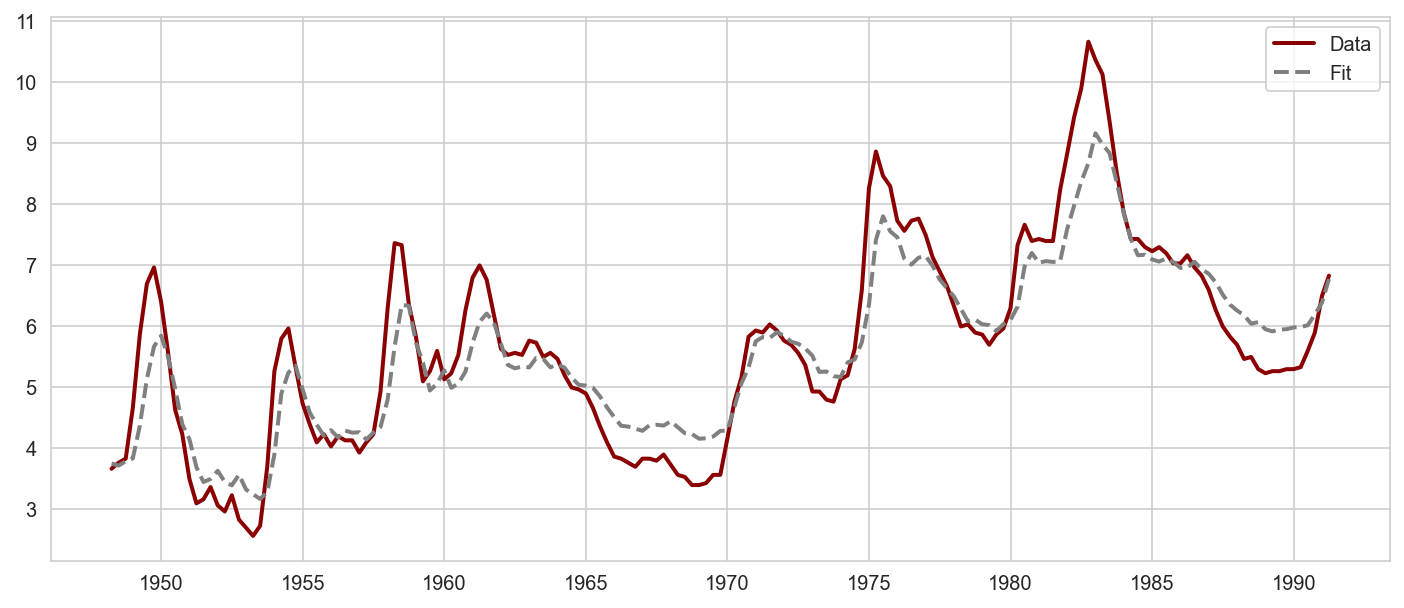

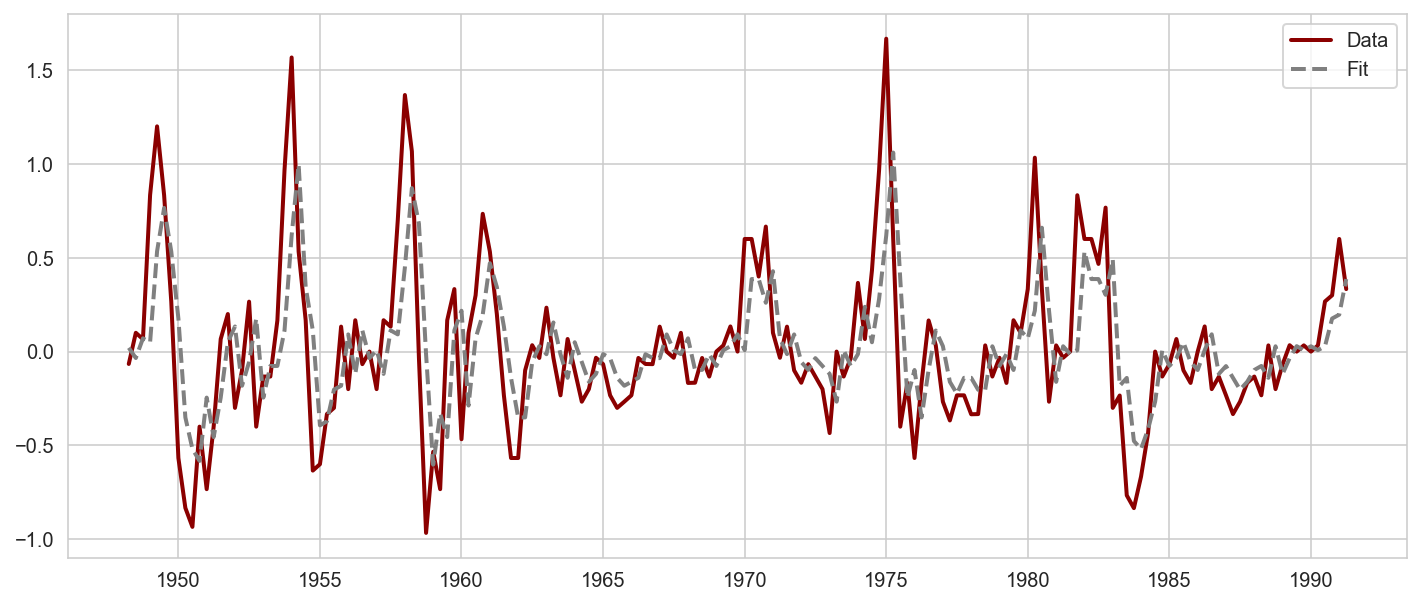

In [21]:
predictions = ar1.predict()
full_pred = data.unemployment_rate.values[0]+np.cumsum(predictions)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], data.unemployment_rate[1:], lw=2, color='darkred', label='Data')
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed', label='Fit')
plt.legend()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='darkred', label='Data')
ax.plot(date_ticks[1:], predictions, lw=2, color='grey', ls='dashed', label='Fit')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(udiff, ar1.fittedvalues)

0.4021339011207825

### "Out-of-sample" predictions

In [23]:
udiff.shape

(173,)

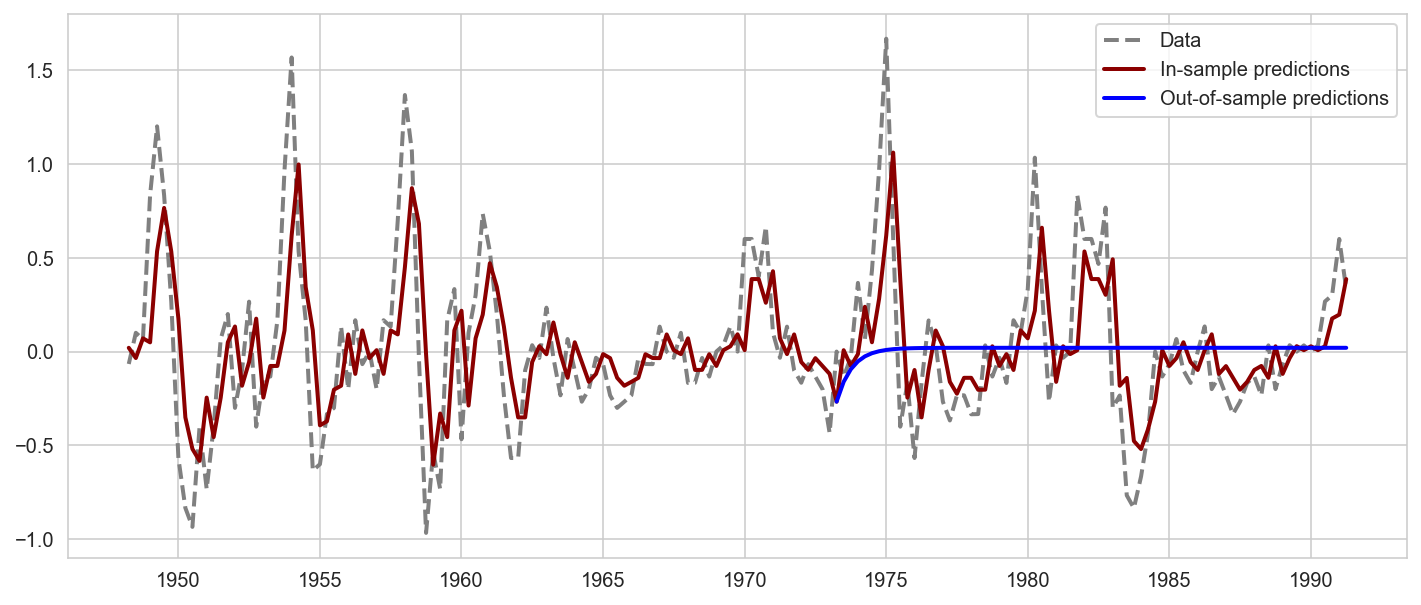

In [24]:
predictions_oos = ar1.predict(start=100, dynamic=True)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed', label='Data')
ax.plot(date_ticks[1:], predictions, lw=2, color='darkred', label='In-sample predictions')
ax.plot(date_ticks[101:], predictions_oos, lw=2, color='blue', label='Out-of-sample predictions')
plt.legend()
plt.show()

<a id="moving-average-ma-models"></a>
<a id="moving-average-ma-models"></a>
## Moving Average (MA) Models
---

**Moving average models** take previous _error terms_ as inputs. They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence — e.g., something going out of stock affecting sales or a sudden rise in popularity.

As with autoregressive models, we have an order term, _q_, and we refer to our model as `MA(q)`. This moving average model is dependent on the last _q_ errors. If we have a time series of sales per week, $y_i$, we can regress each $y_i$ on the last _q_ error terms.

### $$y_t = \epsilon_t + \beta_{1} \epsilon_{t-1} + ... \beta_{n} \epsilon_{t-n} \\
y_t = \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t$$

Sometimes, the mean of the time series is included in the equation:

### $$ y_t = \mu + \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t $$

Moving average models are not as trivial to fit as autoregressive models because the error terms are unobserved. There are a variety of different ways you can estimate the parameters, some of which are covered in [this paper](https://www.it.uu.se/research/publications/reports/2006-022/2006-022-nc.pdf).

With the simpler fitting procedures, a model is iteratively fit, then errors are computed and refit over and over again until the parameters on the errors converge.

MA includes the mean of the time series. The behavior of the model is therefore characterized by random jumps around the mean value.

In an `MA(1)` model, one coefficient on the error of our previous prediction affects our estimate for the next value in the time series.

**We can also fit moving average models using Statsmodels or PyFlux.**

In [25]:
ma1 = ARMA(udiff.values, (0, 1)).fit()
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(0, 1)   Log Likelihood                 -62.769
Method:                       css-mle   S.D. of innovations              0.347
Date:                Tue, 13 Oct 2020   AIC                            131.538
Time:                        10:33:35   BIC                            140.998
Sample:                             0   HQIC                           135.376
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.042      0.409      0.682      -0.066       0.100
ma.L1.y        0.6068      0.054     11.151      0.000       0.500       0.713
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6480           +0.0000j            1.6480            0.5000
-----------------------------------------------------------------------------
"""

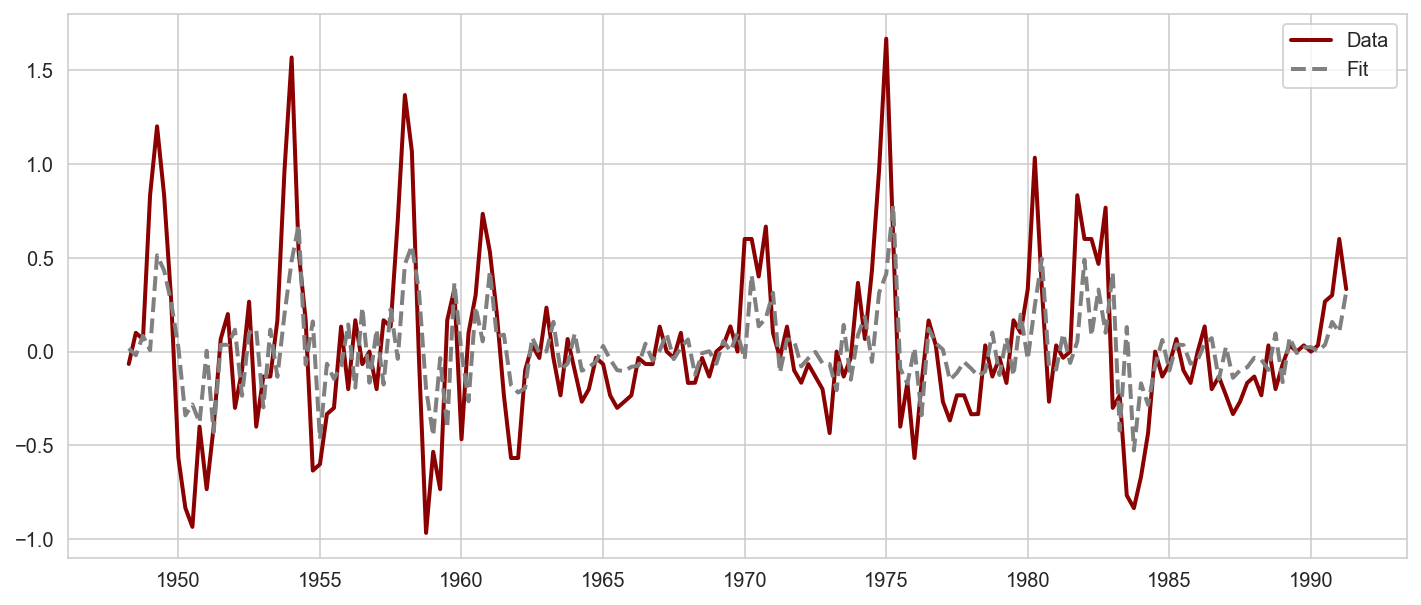

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='darkred',label='Data')
ax.plot(date_ticks[1:], ma1.fittedvalues, lw=2, color='grey', ls='dashed', label='Fit')
plt.legend()
plt.show()

<a id="arma-and-arima-models"></a>
<a id="arma-and-arima-models"></a>
## ARMA and ARIMA Models
---

**ARMA** models combine autoregressive models and moving average models, parameterizing the behavior of models with `p` and `q` terms that correspond to `AR(p)` models and `MA(q)` models.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their predictions not on the prior value but instead on the prior error, allowing us to correct sudden changes based on random events — supply, popularity spikes, etc.

**ARIMA** is just like the `ARMA(p, q)` model, but, rather than predicting the value of the series, it predicts the _differenced_ series or changes in the series. The order of differencing is set by a _d_ term — as in `ARIMA(p, d, q)` — or alternatively, you can just fit an `ARMA(p, q)` model on a differenced time series.

Recall the Pandas `diff()` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

### $$y_t - y_{(t-1)} = ARMA(p, q)$$

In modeling, we assume time series to be "stationary." This handles the stationarity assumption: Instead of detrending or differencing manually, models do this via differencing terms.

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
ar1ma1 = ARIMA(data['unemployment_rate'].dropna().values, (1,1,1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -53.992
Method:                       css-mle   S.D. of innovations              0.330
Date:                Tue, 13 Oct 2020   AIC                            115.984
Time:                        10:33:36   BIC                            128.598
Sample:                             1   HQIC                           121.101
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.061      0.301      0.763      -0.101       0.138
ar.L1.D.y      0.4843      0.094      5.166      0.000       0.301       0.668
ma.L1.D.y      0.2655      0.098      2.701      0.007       0.073       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0648           +0.0000j            2.0648            0.0000
MA.1           -3.7665           +0.0000j            3.7665            0.5000
-----------------------------------------------------------------------------
"""

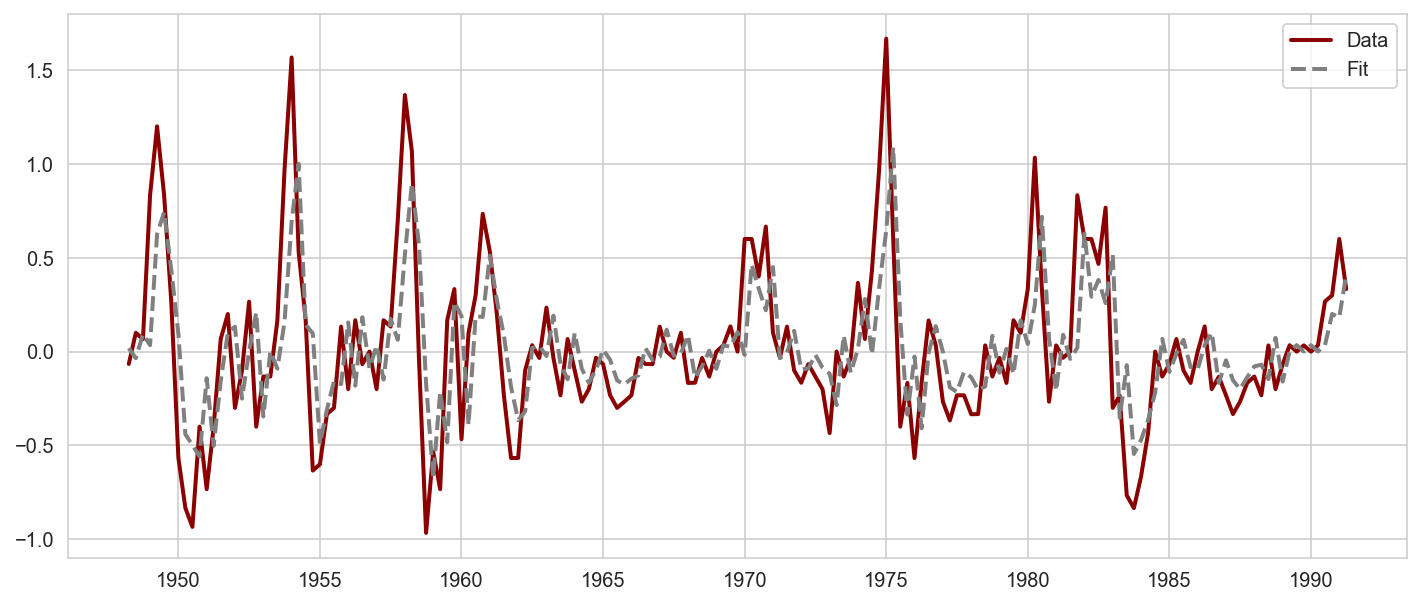

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='darkred',label='Data')
ax.plot(date_ticks[1:], ar1ma1.fittedvalues, lw=2, color='grey', ls='dashed', label='Fit')
plt.legend()
plt.show()

### Reconstructing the "full" prediction

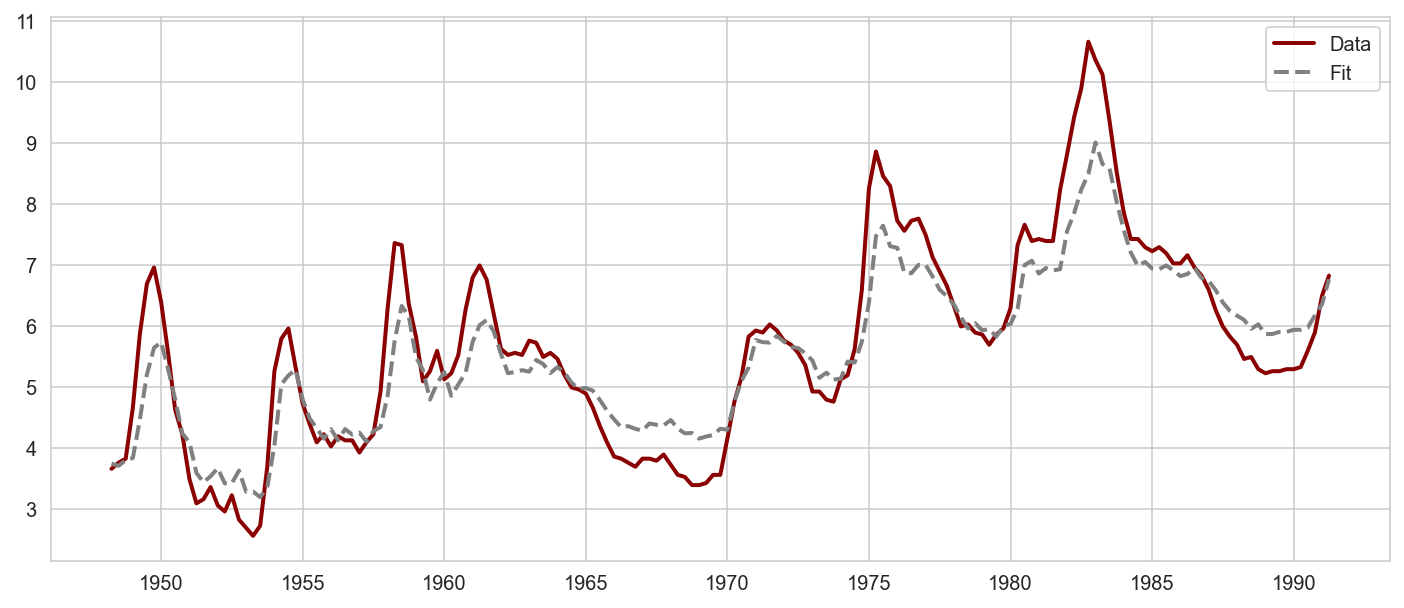

In [30]:
full_pred = data.unemployment_rate.values[0]+np.cumsum(ar1ma1.fittedvalues)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], data.unemployment_rate[1:], lw=2, color='darkred', label='Data')
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed', label='Fit')
plt.legend()
plt.show()

<a id="how-to-choose-the-right-p-and-q-parameters"></a>
<a id="how-to-choose-the-right-p-and-q-parameters"></a>
## How to Choose the Right `p` and `q` Parameters
---

In general, it's never a bad idea to choose your parameters based on hold-out testing; that is to say, checking the performance of your model on future time points based on different choices of `p` and `q` for an ARIMA model.

However, you can get a sense for which parameters will work best based on autocorrelation and partial autocorrelation charts.

[This site](https://people.duke.edu/~rnau/411arim3.htm) offers a detailed overview of how to use ACF and PACF to determine your parameters.

Below are some basic general guidelines. Remember that these rules apply to the ACF and PACF plots of differenced time series rather than the original time series (the exception being if your time series is stationary and does not require differencing):

1. If the PACF has a sharp cut-off and the lag-1 ACF value is positive, choose an `AR(x)` term where `x` is the lag in the PACF after the cut-off.
2. If the ACF has a sharp cut-off and the lag-1 ACF value is negative, choose an `MA(x)` term where `x` is the lag in the ACF after the cut-off.
3. If both the ACF and PACF show a gradual decay, an ARMA model is likely appropriate as opposed to AR or MA alone.

Context 1 above corresponds to time series that are "underdifferenced," as indicated by a positive autocorrelation at lat 1. Likewise, Context 2 is "overdifferenced," as indicated by a negative autocorrelation.

In general, you should try to choose an AR or MA model as opposed to an ARMA model. The AR and MA terms can work against each other in the model and create an overly complex representation.